In [3]:
import os

import numpy as np

import utils, odes

In [4]:
OUTPUT_DIR = ".local/simulations/Competitive Inhibition"
CSV_FILE_PATH = os.path.join(OUTPUT_DIR, "simulation.csv")
PLOT_FILE_PATH = os.path.join(OUTPUT_DIR, "simulation.png")

In [5]:
os.makedirs(name=OUTPUT_DIR, exist_ok=True)

In [6]:
time_steps, state_history = utils.simulate(
    ode_system=odes.ode_inhibitive_competition,
    initial_condition=np.array([ 100, 100, 5, 0, 0, 0 ]),
    delta_t=0.1,
    t_final=50,
    solver=utils.rk4,
    ode_system_kwargs= {
        "k1": 0.1, "k2": 0.1, "k3": 0.1,
        "k4": 0.1, "k5": 0.1,
    }
)

In [7]:
utils.save_simulation(
    time_steps=time_steps,
    state_history=state_history,
    columns_labels=[ 'S', 'E', 'I', 'ES', 'EI', 'P' ],
    file_path=CSV_FILE_PATH
)

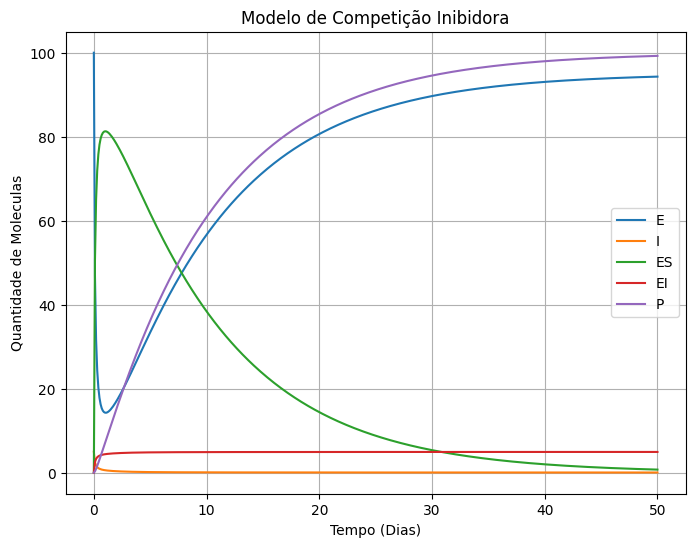

In [8]:
utils.plot_simulation(
    time_steps=time_steps,
    state_history=state_history,
    xlabel="Tempo (Dias)",
    ylabel="Quantidade de Moleculas",
    title="Modelo de Competição Inibidora",
    columns_to_plot=[ 1, 2, 3, 4, 5 ],
    columns_labels=[ 'E', 'I', 'ES', 'EI', 'P' ],
    figure_path=PLOT_FILE_PATH
)

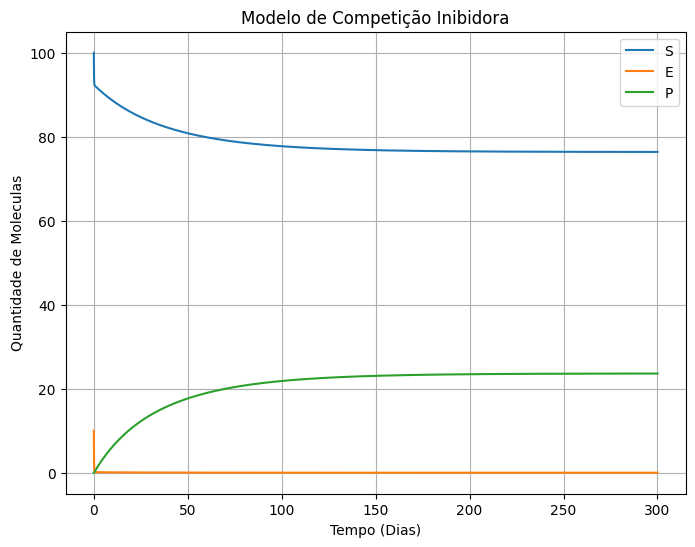

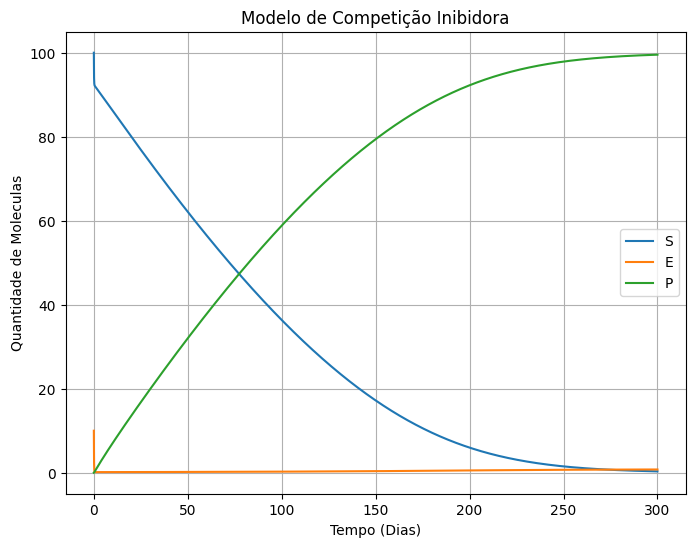

In [42]:
conditions_name=[
    "LimitantePlot1_ByE_and_I",
    "LimitantePlot2_ByE_and_I"
]
initial_coditions=[
    # S, E, I, ES, EI, P
    np.array([ 100, 10, 15, 0, 0, 0 ]),
    np.array([ 100, 10, 15, 0, 0, 0 ]),
]

parameters=[
    {
        "k1": 0.1, "k2": 0.1, "k3": 0.1,
        "k4": 0.2, "k5": 0.0,
    },
    {
        "k1": 0.1, "k2": 0.1, "k3": 0.1,
        "k4": 0.2, "k5": 0.1,
    }
]

for condition_name, initial_condition, p in zip(conditions_name, initial_coditions, parameters):
    time_steps, state_history = utils.simulate(
        ode_system=odes.ode_inhibitive_competition,
        initial_condition=initial_condition,
        delta_t=0.01,
        t_final=300,
        solver=utils.rk4,
        ode_system_kwargs=p
    )

    utils.plot_simulation(
        time_steps=time_steps,
        state_history=state_history,
        xlabel="Tempo (Dias)",
        ylabel="Quantidade de Moleculas",
        title="Modelo de Competição Inibidora",
        columns_to_plot=[ 0, 1, 5 ],
        columns_labels=[ 'S', 'E', 'P' ],
        figure_path=os.path.join(OUTPUT_DIR, f"simulation_{condition_name}.png")
    )